In [24]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import json
import tiktoken
from tqdm import tqdm

### Open the JSON file with the collected data

In [25]:
file_path = 'simple-scrape.json'

# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

### Let's create a dataframe to store the stats of each kernel

In [26]:
df = pd.DataFrame()
enc = tiktoken.encoding_for_model("gpt-4o-mini")

In [27]:

for target in tqdm(data, desc='Counting tokens'):
    basename = target['basename']
    kernelNames = target['kernelNames']
    for kern in kernelNames:
        statsDict = {'target':[basename], 'kernelName': [kern]}
        kernCtx = target['kernels'][kern]
        #print(kernCtx)
        encoded = enc.encode(kernCtx)
        statsDict['numTokens'] = [len(encoded)]

        kernDF = pd.DataFrame.from_dict(statsDict).astype({'target': str, 'kernelName': str, 'numTokens': int})
        df = pd.concat([df, kernDF], ignore_index=True)




Counting tokens: 100%|██████████| 447/447 [00:16<00:00, 26.37it/s]


In [30]:
# let's check our dataframe
print(df.shape)
print(df.head())

(1222, 3)
          target             kernelName  numTokens
0  accuracy-cuda        accuracy_kernel       1154
1       ace-cuda              allenCahn       7879
2       ace-cuda         calculateForce       7879
3       ace-cuda    boundaryConditionsU       7879
4       ace-cuda  boundaryConditionsPhi       7879


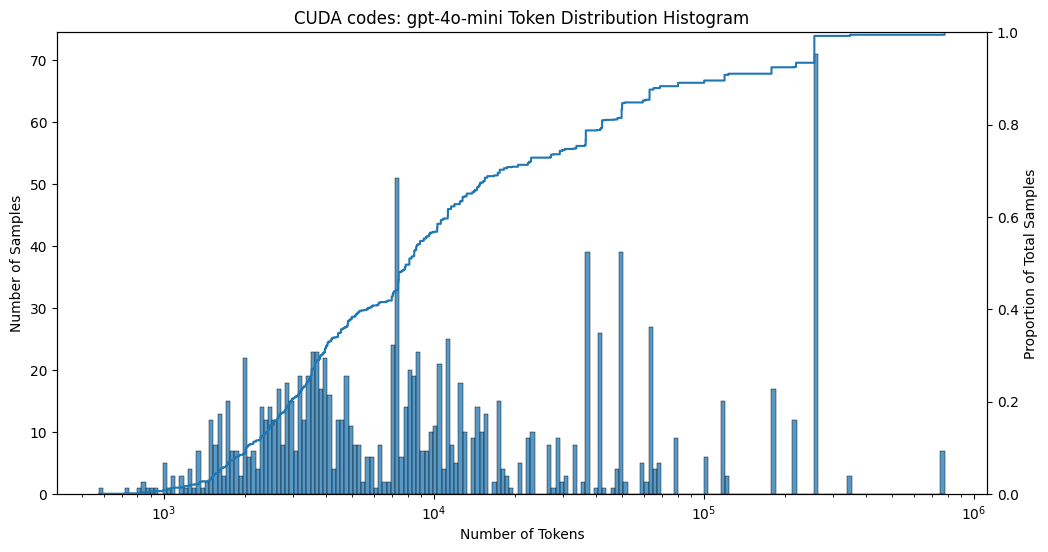

In [33]:

fig, ax = plt.subplots(1, figsize=(12,6))

sns.histplot(df, x='numTokens', bins=200, ax=ax, log_scale=True)
ax2 = ax.twinx()
sns.ecdfplot(df, x='numTokens', ax=ax2, log_scale=True)

ax.set_xlabel('Number of Tokens')
ax.set_ylabel('Number of Samples')
ax2.set_ylabel('Proportion of Total Samples')

ax.set_title('CUDA codes: gpt-4o-mini Token Distribution Histogram')

plt.show()
